**Insights sobre as variáveis**

Entender o comportamento dos nossos customers

- Observamos que ninguém compra as 00, HR_0

Adicioanr aqui o índice do Código

IDEA: IS_CHAIN: vender-count, quantas dessas lojas eram chain...!!!! e termos a percentagem da compra, quantas compras foram Chain
IS_CHAIN: explain that it might be removed---das number of orders, which ones are form a chain restaurants -------Assumption, com base nas linhas com total errado
Criar colunas que façam sentido: Number of order --> total number of orders(soma dos dias da semana)
Temos incoerencias entre o total de days of the week e soma das horas, nas rows em que temos missing values em HR0: uma solução seria imputar os valores de HR0 com base na diferença entre total de days of the week e hora da compra

Morning; afternoon, evening order; rever isto

Adicioanr aqui info sobre a equipa

## **Group Members:**

##  **The Project**

## **METADATA**

## **1.Imports**

In [1]:
#Here we are importing the necessary librais for our analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Data Exploration**

## **2.1. Importing the data**

In [2]:
#Importing our dataset into a variable "food-df"
food_df=pd.read_csv("DM2425_ABCDEats_DATASET.csv")  

## **2.2. Initicial Analysis**

In [3]:
#Checking the first 6 rows of our dataset
food_df.head(6)
#Comentários:
#O first order é o dia em que a compra foi feita, de 0 a 90 dias, ou seja, se tem dia 0 é porque foi feito no dia que o dataset começou
#Neste dataset não faz sentido ter compras que não aconteceram, que há casos
#Temos que tornar a customer ID a index column

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0
5,6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# checking the number of columns and rows of our dataset
print(f"\033[1;30mOur dataset has \033[1;36m{food_df.shape[0]}\033[1;30m rows and \033[1;36m{food_df.shape[1]}\033[1;30m columns\033[0m")


Our dataset has 31888 rows and 56 columns


In [5]:
#Getting the information about our dataset: column, column length, and datatype, in order to identify possible wrong dataypes
food_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

***TODO:
Discutir/entender sobre datatype do is_chain !!!!***

In [6]:
food_df['is_chain'].value_counts()

1     8547
0     6104
2     5893
3     3698
4     2165
5     1380
6      946
7      679
8      500
9      374
10     291
11     248
12     169
13     152
14     138
15      89
16      68
18      65
17      55
19      35
20      34
21      29
22      26
24      23
23      20
26      20
27      16
25      14
28      13
29      10
31       9
30       9
32       8
33       6
34       6
36       5
43       5
40       5
37       4
35       4
45       4
39       2
42       2
48       2
75       1
63       1
54       1
83       1
49       1
46       1
61       1
44       1
67       1
56       1
81       1
73       1
47       1
38       1
65       1
80       1
Name: is_chain, dtype: int64

In [7]:
food_df['first_order']  #TODO NaN values, que não fazem sentido, sendo que é preciso ter um aorder placed


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
31883    NaN
31884    NaN
31885    NaN
31886    NaN
31887    NaN
Name: first_order, Length: 31888, dtype: float64

In [8]:
food_df.describe(include=object).T

,count,unique,top,freq
customer_id,31888,31875,742ca068fc,2
customer_region,31888,9,8670,9761
last_promo,31888,4,-,16748
payment_method,31888,3,CARD,20161


In [9]:
#Checking if our customer_id column has duplicates 
len(food_df['customer_id'].unique()) # len diferent than nr of rows... should have duplicates

31875

In [10]:
#Getting an overaal statistics of our dataset columns
food_df.describe().round()

#Porque os valores estão no 75% e está beverages vazio.....????????
#Same com o CUI Cafe

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.0,31888.0,31888.0,31888.0,31782.0,31888.0,31888.0,31888.0,31888.0,31888.0,...,31888.0,31888.0,31888.0,31888.0,31888.0,31888.0,31888.0,31888.0,31888.0,31888.0
mean,28.0,3.0,6.0,3.0,28.0,64.0,5.0,10.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,7.0,3.0,7.0,4.0,24.0,23.0,12.0,24.0,8.0,6.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
min,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,23.0,1.0,2.0,1.0,7.0,49.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,26.0,2.0,3.0,2.0,22.0,70.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,31.0,4.0,7.0,3.0,45.0,83.0,6.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,80.0,41.0,269.0,83.0,90.0,90.0,280.0,897.0,229.0,326.0,...,13.0,23.0,22.0,20.0,24.0,35.0,36.0,11.0,15.0,13.0


In [11]:
#We realized that no purchase is done at HR_O
food_df['HR_0'].value_counts()
#Pode servir como insight, nng compra 00:00

0.0    30723
Name: HR_0, dtype: int64

## **2.3.Check Duplicate Values**


In [12]:
#Checking the duplicate values
duplicates=food_df.duplicated().sum()
print(f"\033[1;30mOur dataset has \033[1;36m{duplicates}\033[1;30m duplicated rows")

Our dataset has 13 duplicated rows


In [13]:
#Dropping the duplicated rows
food_df.drop_duplicates(inplace=True)
new_duplicates=food_df.duplicated().sum()


In [14]:
#Checking again, if we still have duplicated rows
print(f"\033[1;30mOur dataset has now \033[1;36m{new_duplicates}\033[1;30m duplicated rows")

Our dataset has now 0 duplicated rows


## **2.4.Checking the Missing Values**

In [15]:
#Checking how many missing values we have for each column

# Checking and printing columns with missing values
for column in food_df.columns:
    missing_values = food_df[column].isna().sum()
    if missing_values > 0:
        print(f"\033[1;36m{column} \033[1;36m has {missing_values} missing values")

customer_age  has 727 missing values
first_order  has 106 missing values
HR_0  has 1164 missing values


Replacing "-" by NaN

In [16]:
## we noticed that some missing data was labeled as - and so we relaced by nan
food_df.replace("-", np.nan, inplace=True)  

In [17]:

# Checking and printing columns with missing values
for column in food_df.columns:
    missing_values = food_df[column].isna().sum()
    if missing_values > 0:
        print(f"\033[1;36m{column} \033[1;30m has {missing_values} missing values")



customer_region  has 442 missing values
customer_age  has 727 missing values
first_order  has 106 missing values
last_promo  has 16744 missing values
HR_0  has 1164 missing values


## **2.5.Coherence Check**

## 2.5.1 Changing the Data Types

In [18]:
#Checking again our datatypes
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31875 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31875 non-null  object 
 1   customer_region           31433 non-null  object 
 2   customer_age              31148 non-null  float64
 3   vendor_count              31875 non-null  int64  
 4   product_count             31875 non-null  int64  
 5   is_chain                  31875 non-null  int64  
 6   first_order               31769 non-null  float64
 7   last_order                31875 non-null  int64  
 8   last_promo                15131 non-null  object 
 9   payment_method            31875 non-null  object 
 10  CUI_American              31875 non-null  float64
 11  CUI_Asian                 31875 non-null  float64
 12  CUI_Beverages             31875 non-null  float64
 13  CUI_Cafe                  31875 non-null  float64
 14  CUI_Ch

In [19]:
# customer_id meter em index
food_df = food_df.set_index('customer_id')

# customer_age mudar para int
#food_df['customer_age'] = food_df['customer_age'].astype(int)

# first_order mudar para int
#food_df['first_order'] = food_df['first_order'].astype(int)

# is_chain entender o datatype e a variavel

# trocar os NaN por No Promotion
food_df['last_promo'] = food_df['last_promo'].fillna('NOPROMO')

# meter HR_0 a 0 os missing values pq todos ja os que estao la sao 0 /// #TODO mas temos de discutir isto
#food_df['HR_0'] = food_df['HR_0'].fillna(0)


In [20]:
food_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31875 entries, 1b8f824d5e to fd40d3b0e0
Data columns (total 55 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_region           31433 non-null  object 
 1   customer_age              31148 non-null  float64
 2   vendor_count              31875 non-null  int64  
 3   product_count             31875 non-null  int64  
 4   is_chain                  31875 non-null  int64  
 5   first_order               31769 non-null  float64
 6   last_order                31875 non-null  int64  
 7   last_promo                31875 non-null  object 
 8   payment_method            31875 non-null  object 
 9   CUI_American              31875 non-null  float64
 10  CUI_Asian                 31875 non-null  float64
 11  CUI_Beverages             31875 non-null  float64
 12  CUI_Cafe                  31875 non-null  float64
 13  CUI_Chicken Dishes        31875 non-null  float64
 1

In [21]:
food_df.head(10)

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,2,0,0,0,0,0
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,0,0,0,0,0
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,0,0,0,0,0
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,1,0,0,0,0,0,0,0,0,0
4eb37a6705,4660,20.0,2,5,0,0.0,2,NOPROMO,DIGI,14.57,...,0,0,0,0,0,0,0,0,0,0
6aef2b6726,8670,40.0,2,2,0,0.0,2,FREEBIE,DIGI,0.00,...,0,0,0,0,0,0,0,0,0,0
8475ee66ef,2440,24.0,2,2,2,0.0,2,NOPROMO,CARD,5.88,...,0,0,0,1,0,0,0,0,0,0
f2f53bcc67,8670,27.0,2,3,2,0.0,2,DISCOUNT,DIGI,11.71,...,0,1,0,0,0,0,0,0,0,0
5b650c89cc,2360,20.0,3,4,2,0.0,3,DISCOUNT,DIGI,2.75,...,0,0,0,1,0,1,0,0,0,1


In [22]:
food_df['midday_orders'] = food_df[['HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14']].sum(axis=1)
food_df['evening_orders'] = food_df[['HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21']].sum(axis=1)
food_df['late_night_orders'] = food_df[['HR_22', 'HR_23', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6']].sum(axis=1)

# a divisao foi feita com base no line chart com base nos 3 picos de distribuição dos pedidos

In [23]:
food_df[food_df['is_chain'] == 80].T 


customer_id,4b5be62a93
customer_region,2360
customer_age,33.0
vendor_count,4
product_count,88
is_chain,80
first_order,6.0
last_order,88
last_promo,NOPROMO
payment_method,DIGI
CUI_American,0.0


## **2.5.Data Statistics**

Dividir por categorical; numerical; e por variáveis; tbm por dia/hora

## 2.5.1 Numerical Variables

In [24]:
food_df['Total orders'] = food_df[['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']].sum(axis=1)

In [25]:
food_df['Total orders_HR'] = food_df[[f'HR_{i}' for i in range(24)]].sum(axis=1).astype(int)


In [26]:
food_df.head()

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,...,HR_19,HR_20,HR_21,HR_22,HR_23,midday_orders,evening_orders,late_night_orders,Total orders,Total orders_HR
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,...,0,0,0,0,0,0,2,0.0,2,2
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,...,0,0,0,0,0,2,0,0.0,2,2
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,...,0,0,0,0,0,2,0,0.0,2,2
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,...,0,0,0,0,0,2,0,0.0,2,2
4eb37a6705,4660,20.0,2,5,0,0.0,2,NOPROMO,DIGI,14.57,...,0,0,0,0,0,2,0,0.0,2,2


In [27]:
food_df['Total orders'].unique()

array([ 2,  3,  4,  5,  7,  6, 12, 16, 23, 10,  8, 21, 14, 11, 15, 13,  9,
       20, 26, 17, 25, 54, 30, 18, 42, 19, 32, 36, 22, 28, 34, 24, 33, 46,
       39, 27, 47, 37, 58, 41, 38, 63, 31, 69, 44, 35, 52, 57, 82, 90, 94,
       62, 43, 61, 70, 60, 55, 40,  1,  0, 29, 51, 53, 65, 45, 91, 50, 75,
       49, 48, 80, 59], dtype=int64)

In [28]:
food_df['Total orders_HR'].unique(
    
)

array([ 2,  3,  4,  5,  1,  7,  6, 12, 16, 23,  8, 21, 14, 11, 15, 10, 13,
       20, 26,  9, 17, 22, 54, 30, 18, 25, 42, 19, 32, 36, 28, 34, 24, 33,
       41, 39, 27, 47, 37, 58, 38, 63, 31, 69, 44, 35, 52, 56, 82, 90, 94,
       59, 43, 61, 70, 60, 55, 40,  0, 29, 51, 53, 65, 45, 91, 50, 75, 49,
       48, 77, 62])

Different Values

In [29]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [30]:
food_df

,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,midday_orders,evening_orders,late_night_orders,Total orders,Total orders_HR
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2,0.0,2,2
5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0.0,2,2
f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0.0,2,2
180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0.0,2,2
4eb37a6705,4660,20.0,2,5,0,0.0,2,NOPROMO,DIGI,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f4e366c281,8670,30.0,1,1,1,NaN,0,FREEBIE,DIGI,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1,1
f6b6709018,8670,NaN,1,1,0,NaN,0,DELIVERY,DIGI,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.0,1,1
f74ad8ce3f,8670,24.0,1,1,1,NaN,0,NOPROMO,DIGI,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1,1


In [31]:
num_food_df=food_df.select_dtypes(exclude='object')

In [32]:
num_food_df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,midday_orders,evening_orders,late_night_orders,Total orders,Total orders_HR
count,31148.000000,31875.000000,31875.000000,31875.000000,31769.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,30711.0,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000,31875.000000
mean,27.507545,3.102714,5.668424,2.819357,28.469924,63.672376,4.877205,9.955306,2.298224,0.801490,0.768409,1.431801,0.884719,0.950590,1.631818,3.234729,2.996031,0.711966,3.001137,3.910391,0.842040,0.555922,0.567561,0.590933,0.619388,0.677867,0.652957,0.704408,0.0,0.053835,0.063153,0.118306,0.101710,0.081914,0.069616,0.076675,0.131859,0.233945,0.329663,0.378259,0.314259,0.236424,0.215686,0.277114,0.356580,0.391059,0.337098,0.245678,0.142871,0.071184,0.048282,0.045176,1.916769,1.821584,0.581992,4.369035,4.320345
std,7.161828,2.771753,6.957933,3.977977,24.104626,23.227992,11.647043,23.561492,8.475868,6.428422,3.657986,8.193374,5.260910,5.831747,7.444679,11.250094,10.182406,4.537359,9.770104,15.548367,4.433918,1.013634,1.044190,1.045900,1.069558,1.088284,1.069802,1.167592,0.0,0.317031,0.351490,0.497117,0.437549,0.358701,0.329307,0.377349,0.635603,0.725015,0.891312,0.960119,0.842625,0.637513,0.599098,0.738282,0.874598,0.943873,0.894106,0.795433,0.586641,0.348604,0.298324,0.282011,2.989913,2.921192,1.388359,5.084780,5.049923
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3.000000,3.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [33]:
num_food_df['Total orders'].describe()

count    31875.000000
mean         4.369035
std          5.084780
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         94.000000
Name: Total orders, dtype: float64

In [34]:
discrepancy = food_df['Total orders']- food_df['Total orders_HR']

In [35]:
discrepancy.unique()

array([ 0,  1,  2,  3,  5,  4, 12,  9,  8,  7,  6, 11, 15], dtype=int64)

In [36]:
# Example: Summarize total orders by hour
for i in range(24):  
    hr_column = f'HR_{i}'
    grouped_hr = num_food_df.groupby([hr_column]).agg({
        'Total orders': ['sum', 'mean'],
        'Total orders_HR': ['sum', 'count']
    })
    print(f"Group by {hr_column}:\n", grouped_hr)




Group by HR_0:
      Total orders          Total orders_HR       
              sum     mean             sum  count
HR_0                                             
0.0        130757  4.25766          130757  30711
Group by HR_1:
      Total orders            Total orders_HR       
              sum       mean             sum  count
HR_1                                               
0          130130   4.253726          129032  30592
1            6478   6.375984            6209   1016
2            1473   8.138122            1369    181
3             488  10.608696             455     46
4             400  16.666667             365     24
5             160  22.857143             151      7
6              61  15.250000              58      4
7              15   7.500000              15      2
8              15  15.000000              14      1
9              24  24.000000              24      1
14             19  19.000000              19      1
Group by HR_2:
      Total orders       

Talvez criar este como coluna?

## 2.5.2 Categorical Variables

In [37]:
cat_food_df=food_df.select_dtypes(include='object')

In [38]:
cat_food_df.describe()

,customer_region,last_promo,payment_method
count,31433,31875,31875
unique,8,4,3
top,8670,NOPROMO,CARD
freq,9761,16744,20153


## **2.6.Visual Exploration**

Orders Heatmap

In [39]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

from itertools import product

## If you have an error here saying ydata_profiling is not available
## Run the instructions above
## IF you are still unable to install `ydata-profiling` through this method, 
## Comment out the line below importing ProfileReport
from ydata_profiling import ProfileReport

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set()

In [40]:
non_metric_features = food_df.select_dtypes(include='object').columns.to_list()

metric_features = food_df.columns.drop(non_metric_features).to_list()


In [41]:
# agregações dos dias da semana e hrs do dia
hours_of_the_day = food_df[[f'HR_{i}' for i in range(24)]].columns.to_list() 
days_of_the_week = ['DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6']

In [42]:
#plt.figure(figsize=(12, 6))
#sns.heatmap(food_df, cmap="YlGnBu", annot=True, xticklabels=[f"HR{i}" for i in range(24)], yticklabels=['Orders'])
#plt.title('Heatmap of Orders by Hour of the Day')
#plt.show()

In [43]:
# ideas no docs
#Vermos as distribuições, and "uncommon" distributions
#identify outliers, point what they mean
#Explain everything we see, and what they mean.... take insights...????

In [44]:
food_df.columns

Index(['customer_region', 'customer_age', 'vendor_count', 'product_count',
       'is_chain', 'first_order', 'last_order', 'last_promo', 'payment_method',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes',
       'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2',
       'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10',
       'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18',
       'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'midday_orders',
       'evening_orders', 'late_night_orders', 'Total orders',
       'Total orders_HR'],
      dtype='object')

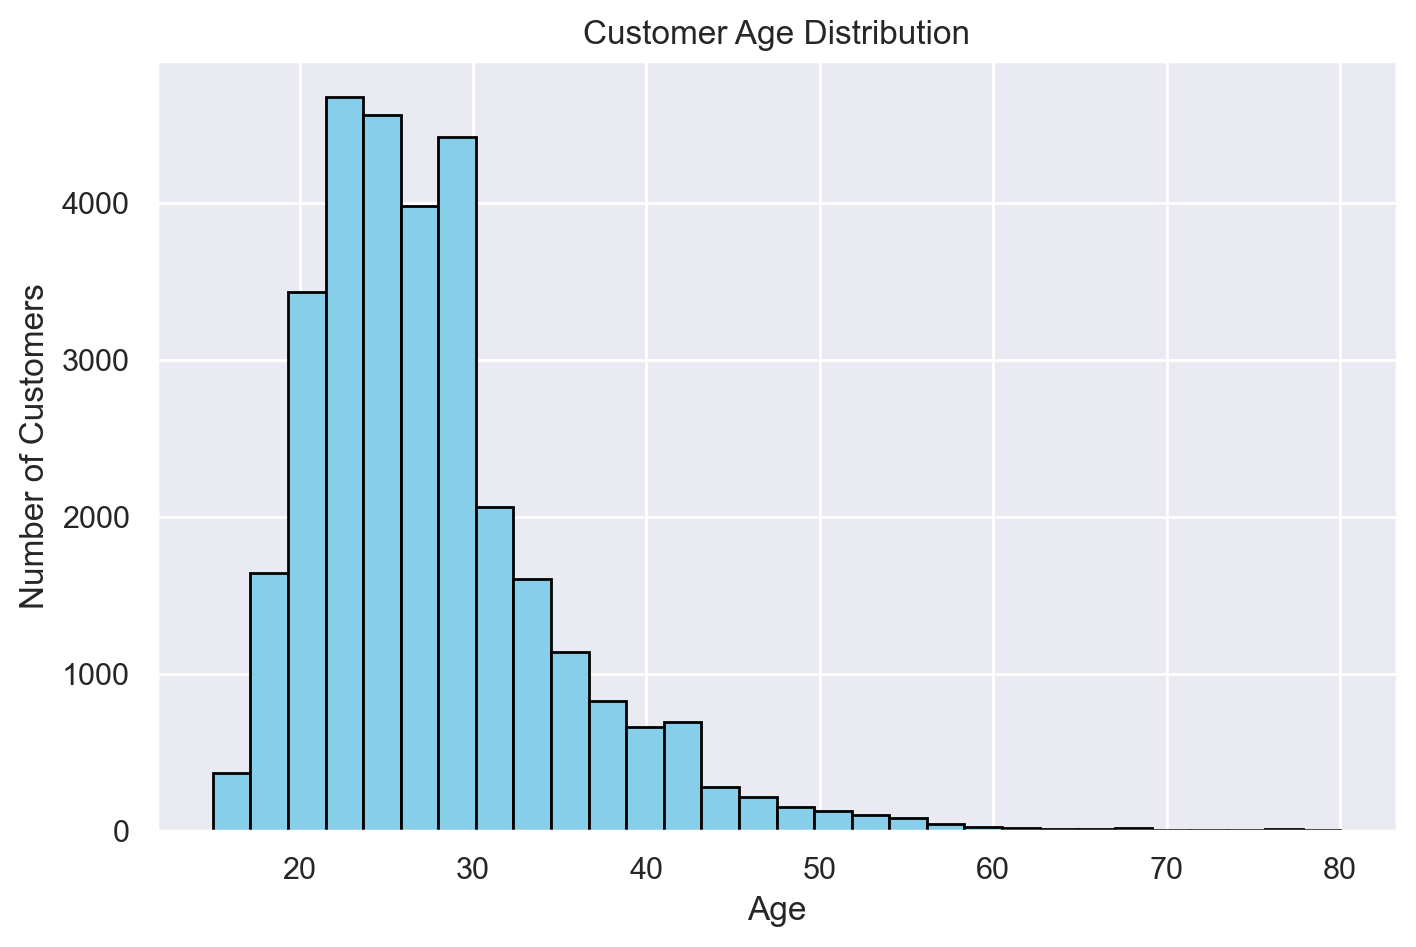

In [55]:
plt.figure(figsize=(8, 5))
plt.hist(food_df['customer_age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

#intrepertar com: normal distribution, range, concentração, e skewness, outliers

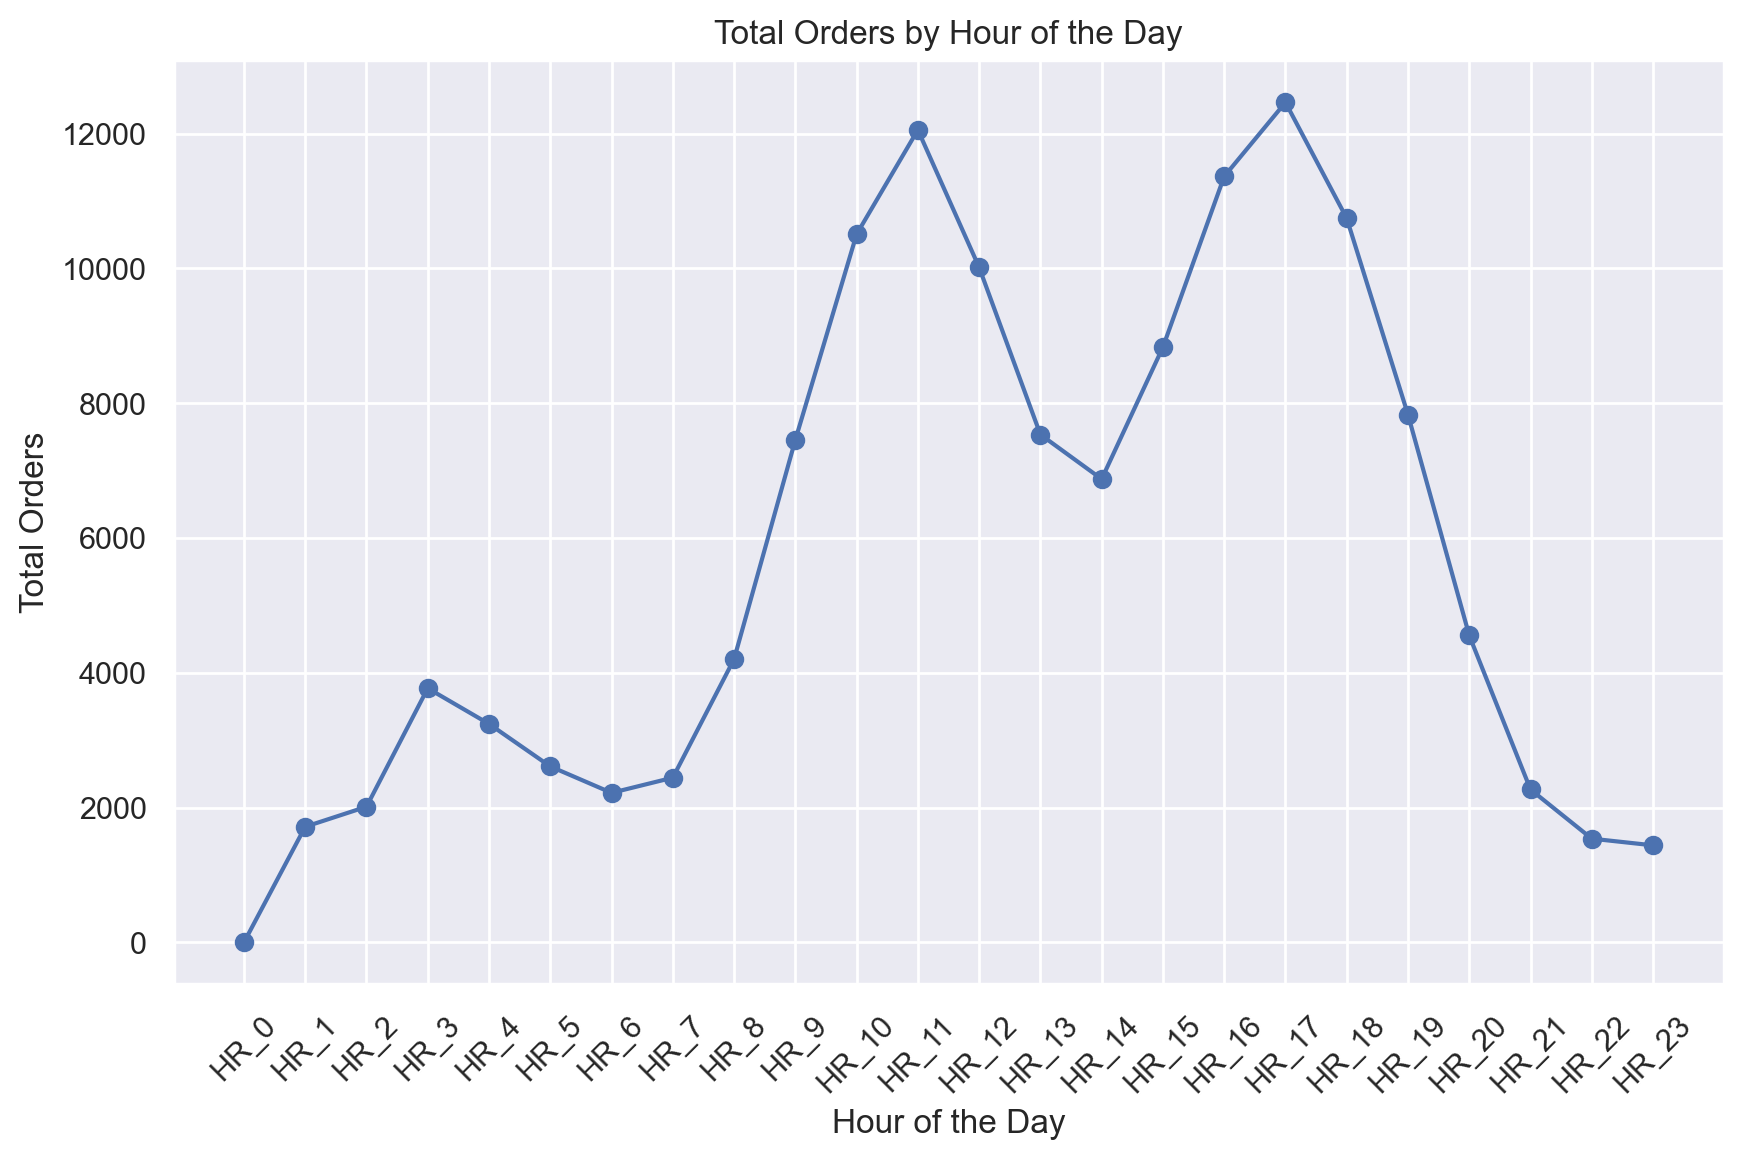

In [46]:
hours_of_the_day = [f'HR_{i}' for i in range(24)]
plt.figure(figsize=(10, 6))
plt.plot(hours_of_the_day, food_df[hours_of_the_day].sum(), marker='o', color='b')
plt.title('Total Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

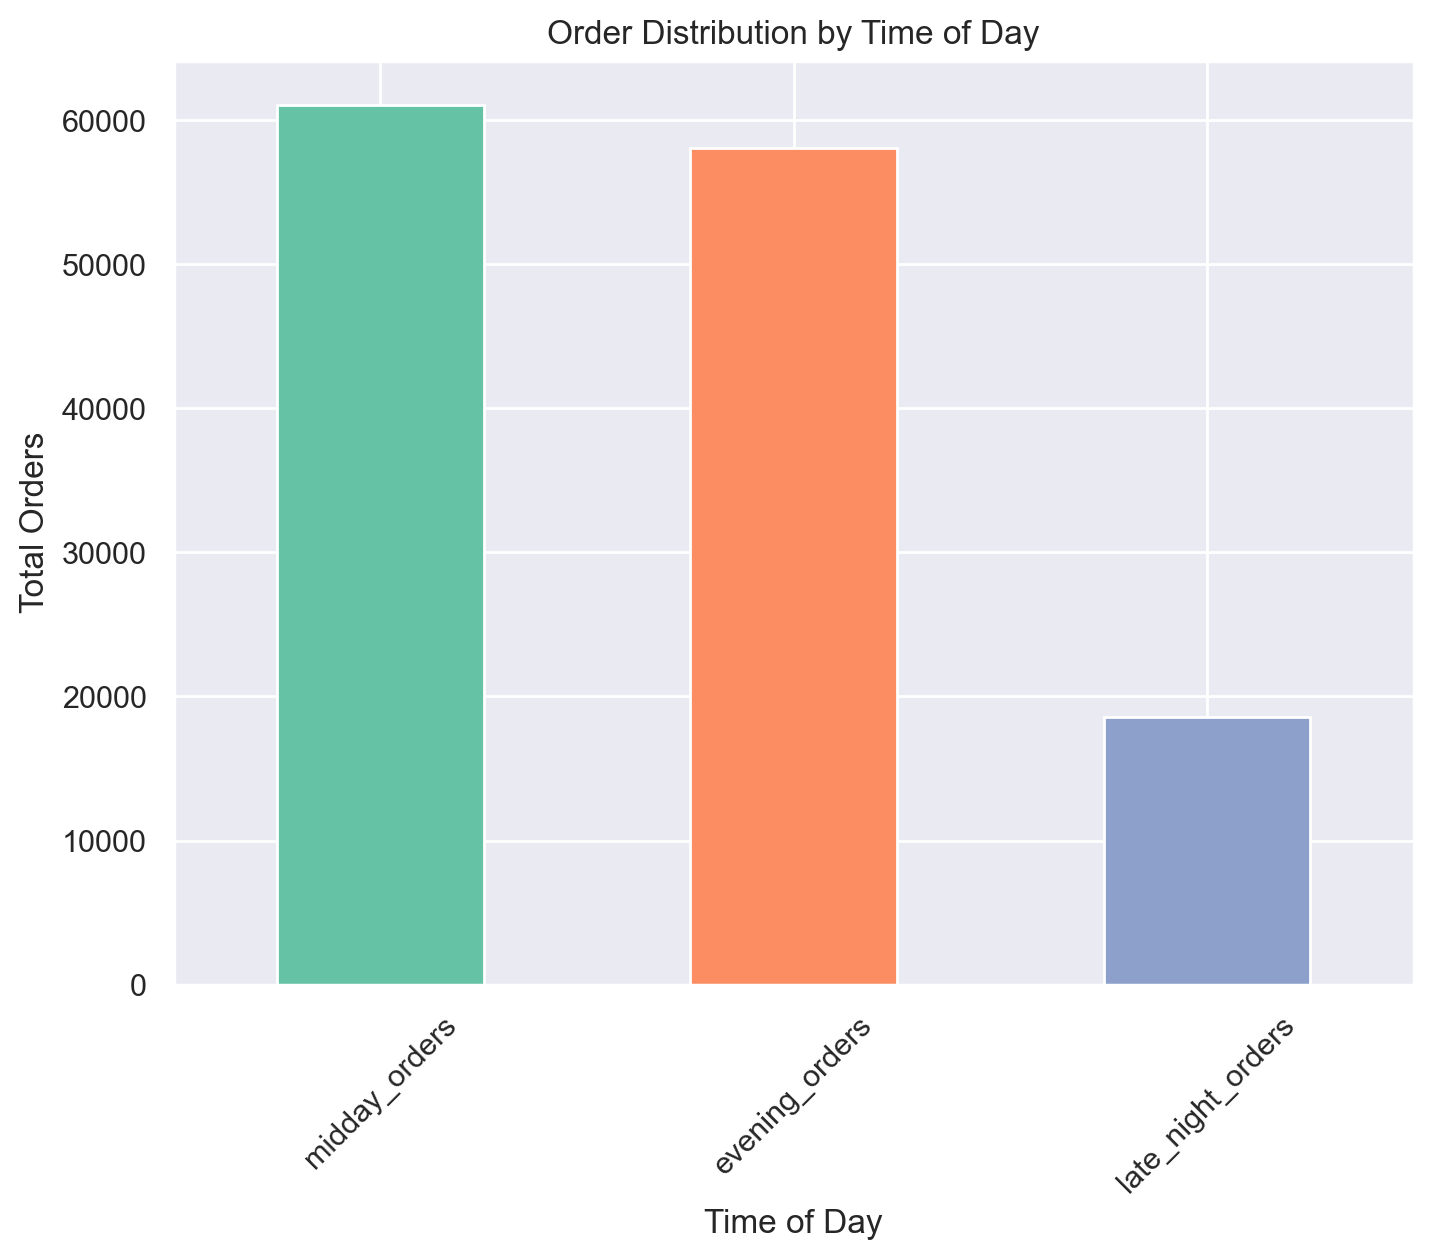

In [47]:
time_of_day_columns = ['midday_orders', 'evening_orders', 'late_night_orders']

plt.figure(figsize=(8, 6))
food_df[time_of_day_columns].sum().plot(kind='bar', color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Order Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

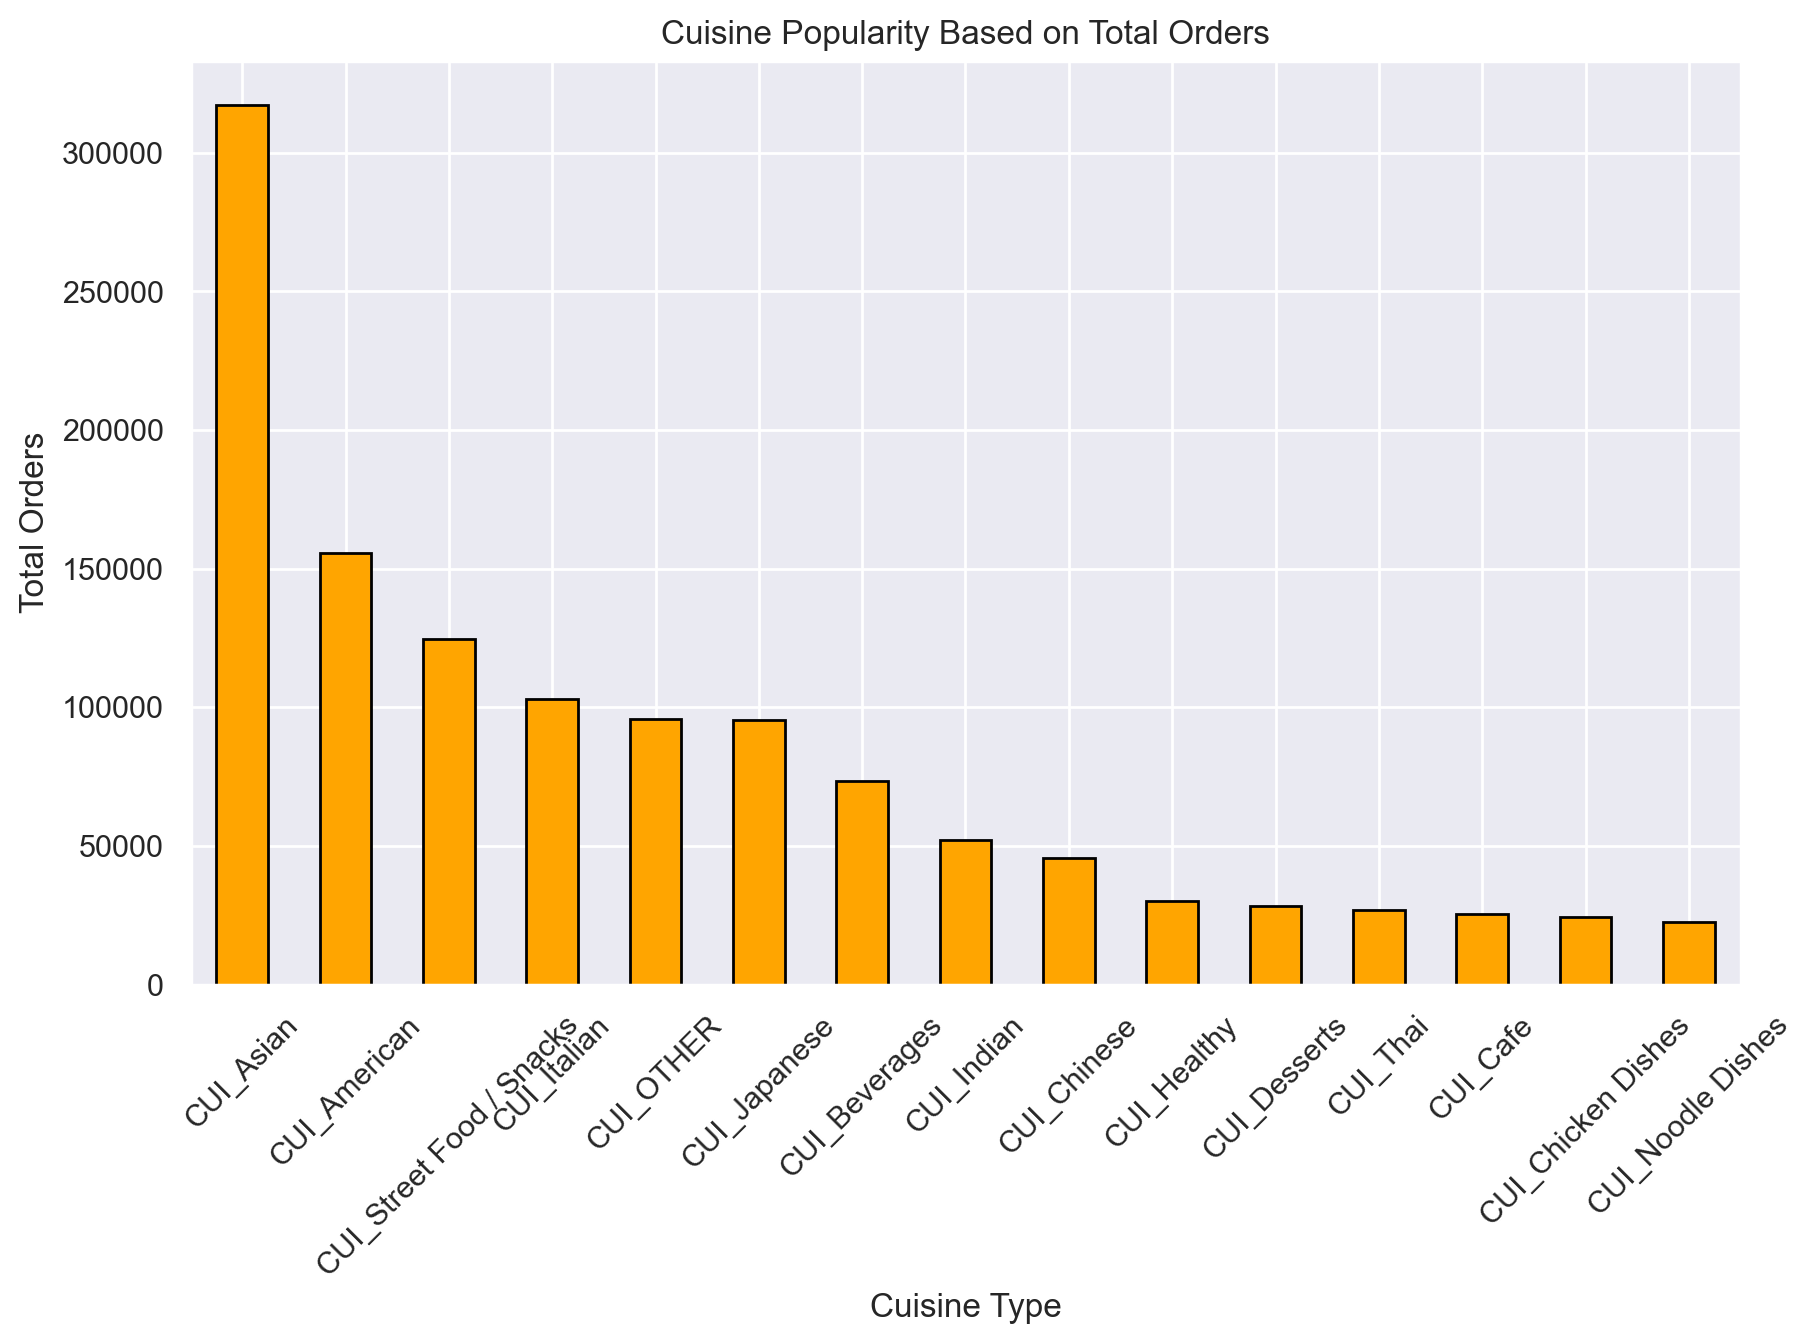

In [55]:
cuisine_columns = [col for col in food_df.columns if col.startswith('CUI_')]
cuisine_totals = food_df[cuisine_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cuisine_totals.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Cuisine Popularity Based on Total Orders')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

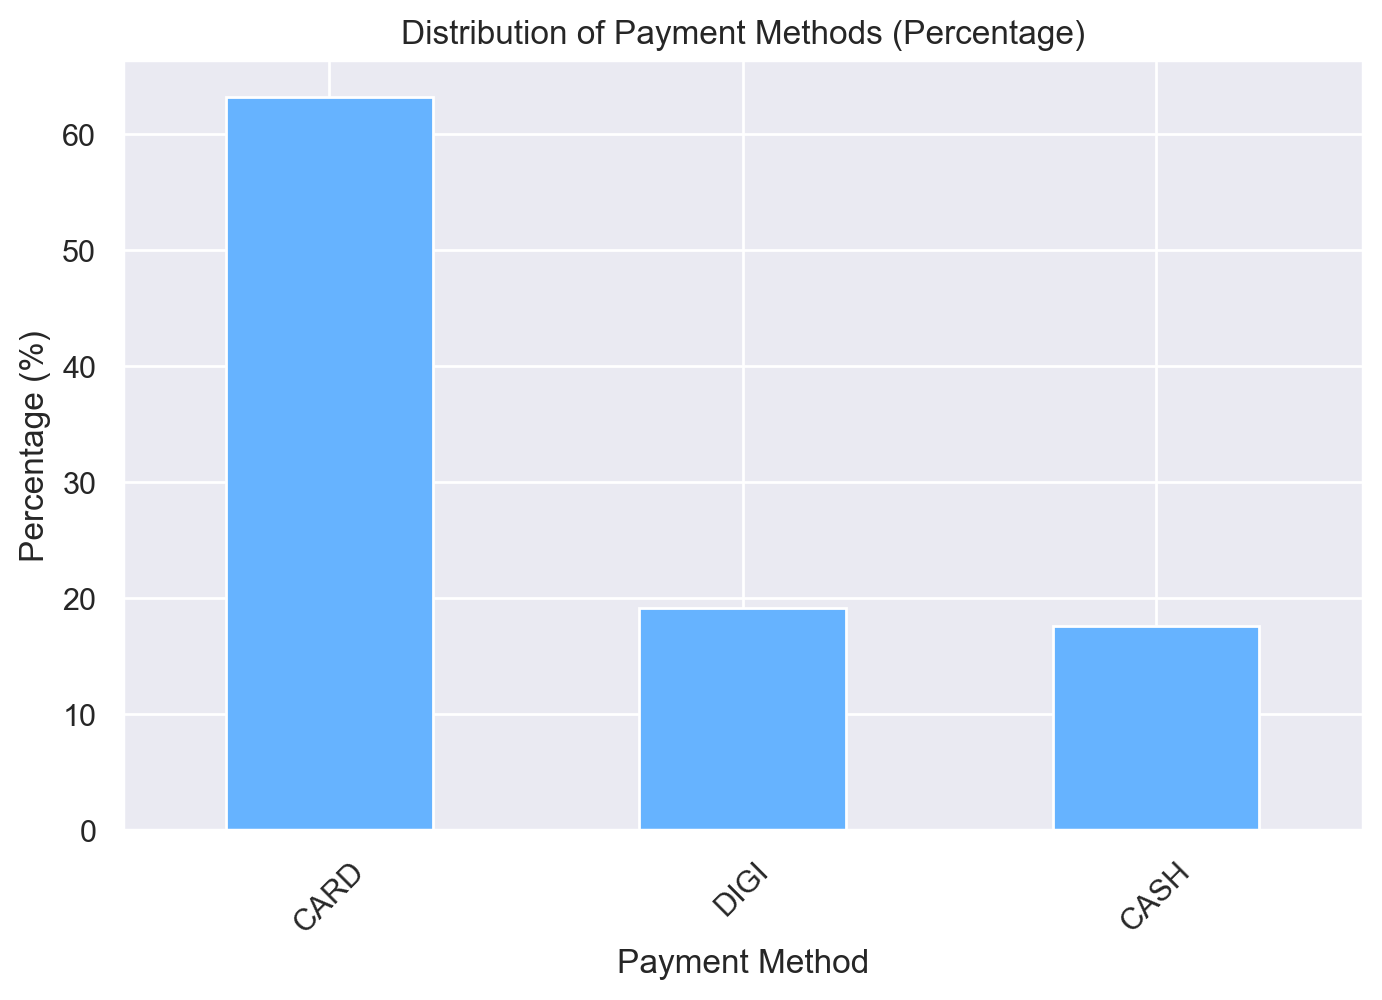

In [66]:
#TODO mudar o grafico
plt.figure(figsize=(8, 5))

# Calculate percentage for each payment method
payment_method_percentage = food_df['payment_method'].value_counts(normalize=True) * 100

# Plot the percentages
payment_method_percentage.plot(kind='bar', color=['#66b3ff'])

# Add title and labels
plt.title('Distribution of Payment Methods (Percentage)')
plt.xlabel('Payment Method')
plt.ylabel('Percentage (%)')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


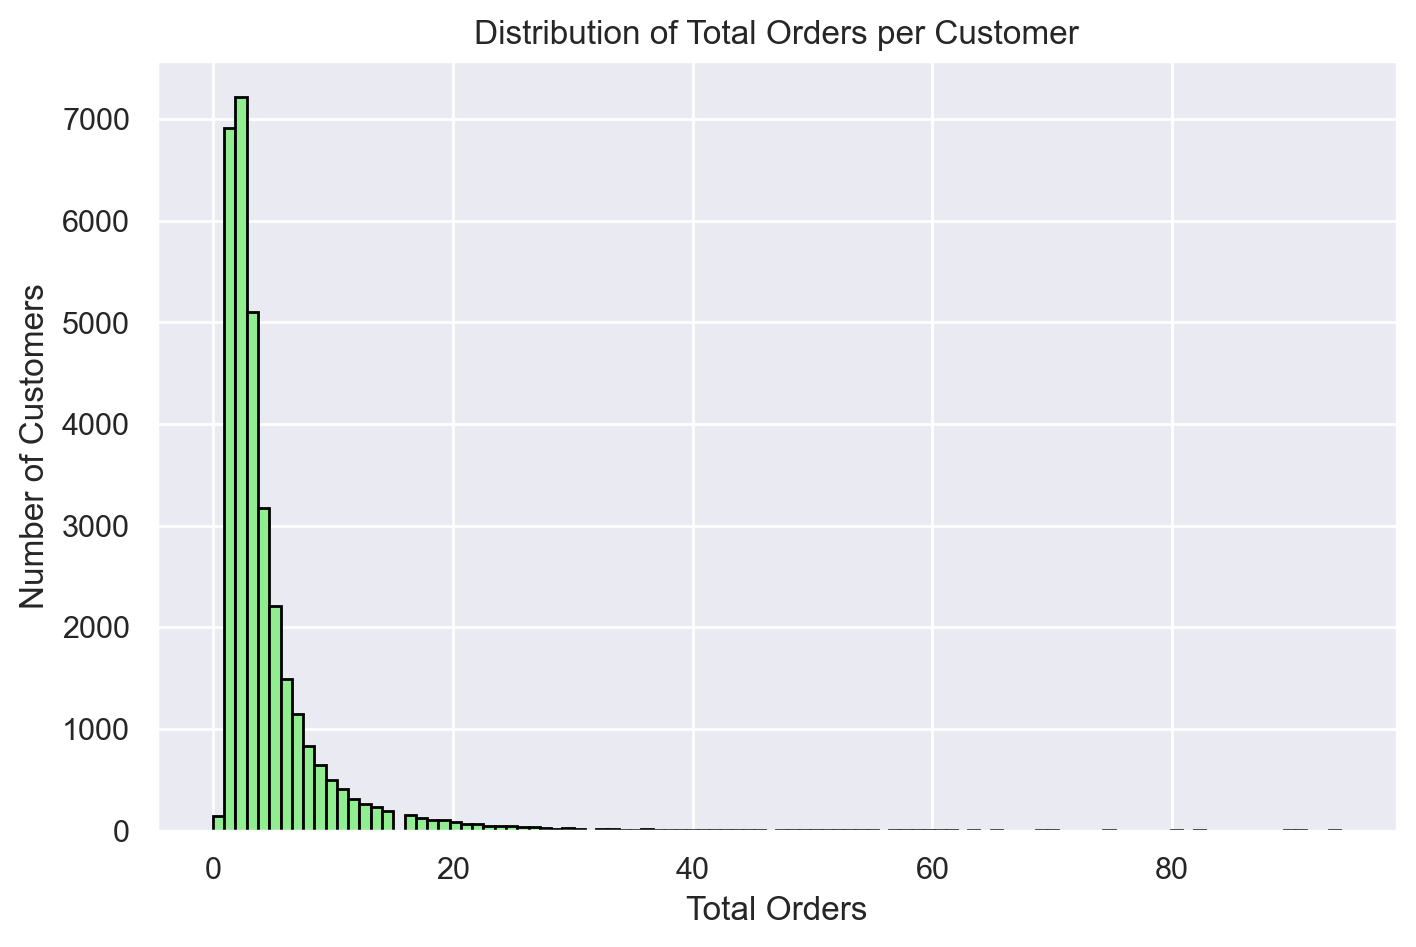

In [59]:
# mudar o grafico, ex. horizontal bar chart
plt.figure(figsize=(8, 5))
plt.hist(food_df['Total orders'], bins=100, color='lightgreen', edgecolor='black')
plt.title('Distribution of Total Orders per Customer')
plt.xlabel('Total Orders')
plt.ylabel('Number of Customers')
plt.show()

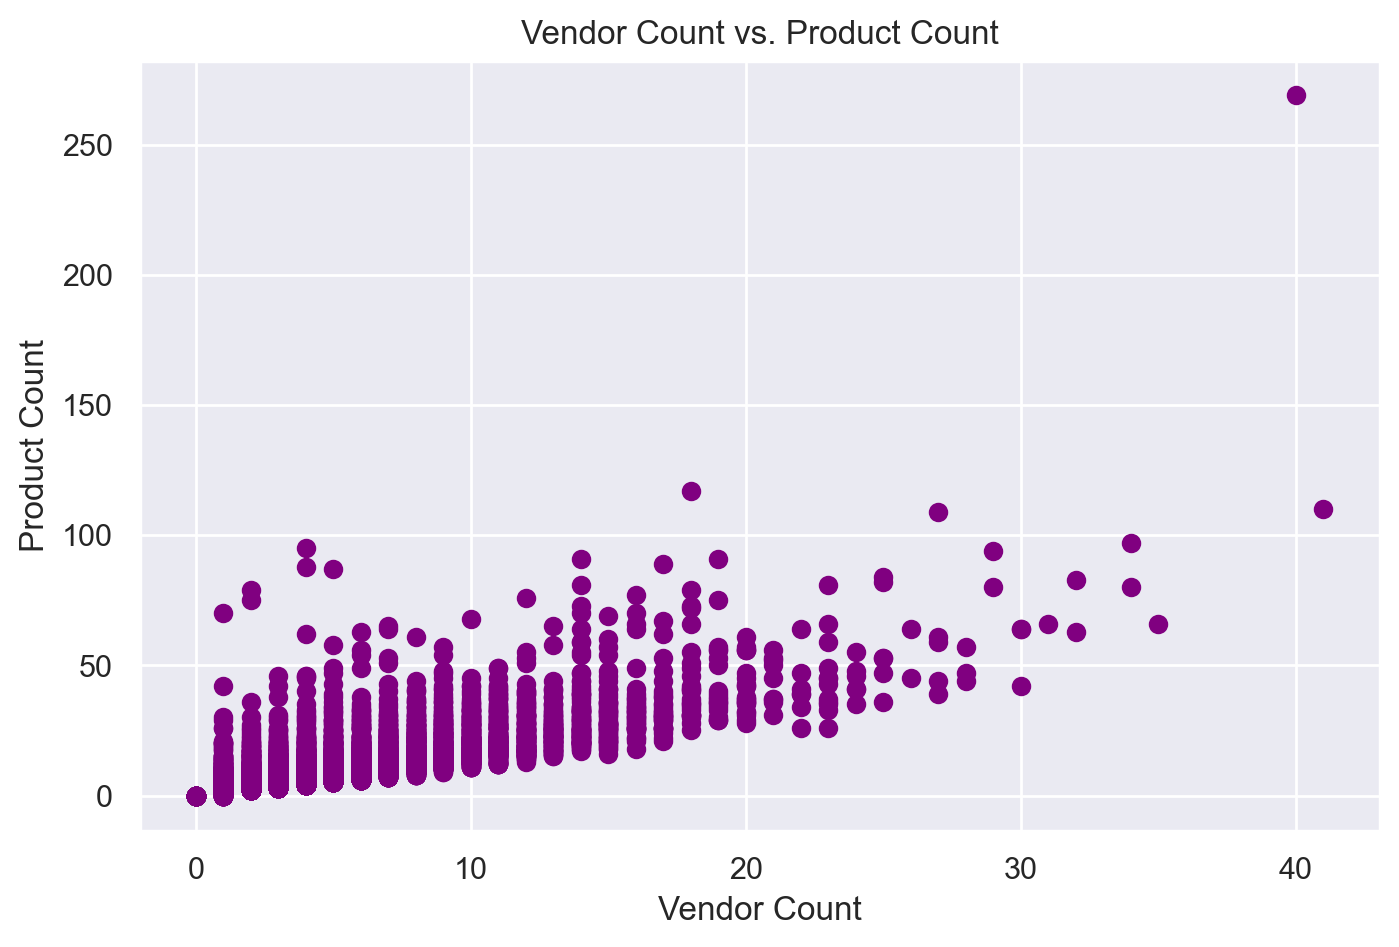

In [61]:
plt.figure(figsize=(8, 5))
plt.scatter(food_df['vendor_count'], food_df['product_count'], color='purple')
plt.title('Vendor Count vs. Product Count')
plt.xlabel('Vendor Count')
plt.ylabel('Product Count')
plt.grid(True)
plt.show()

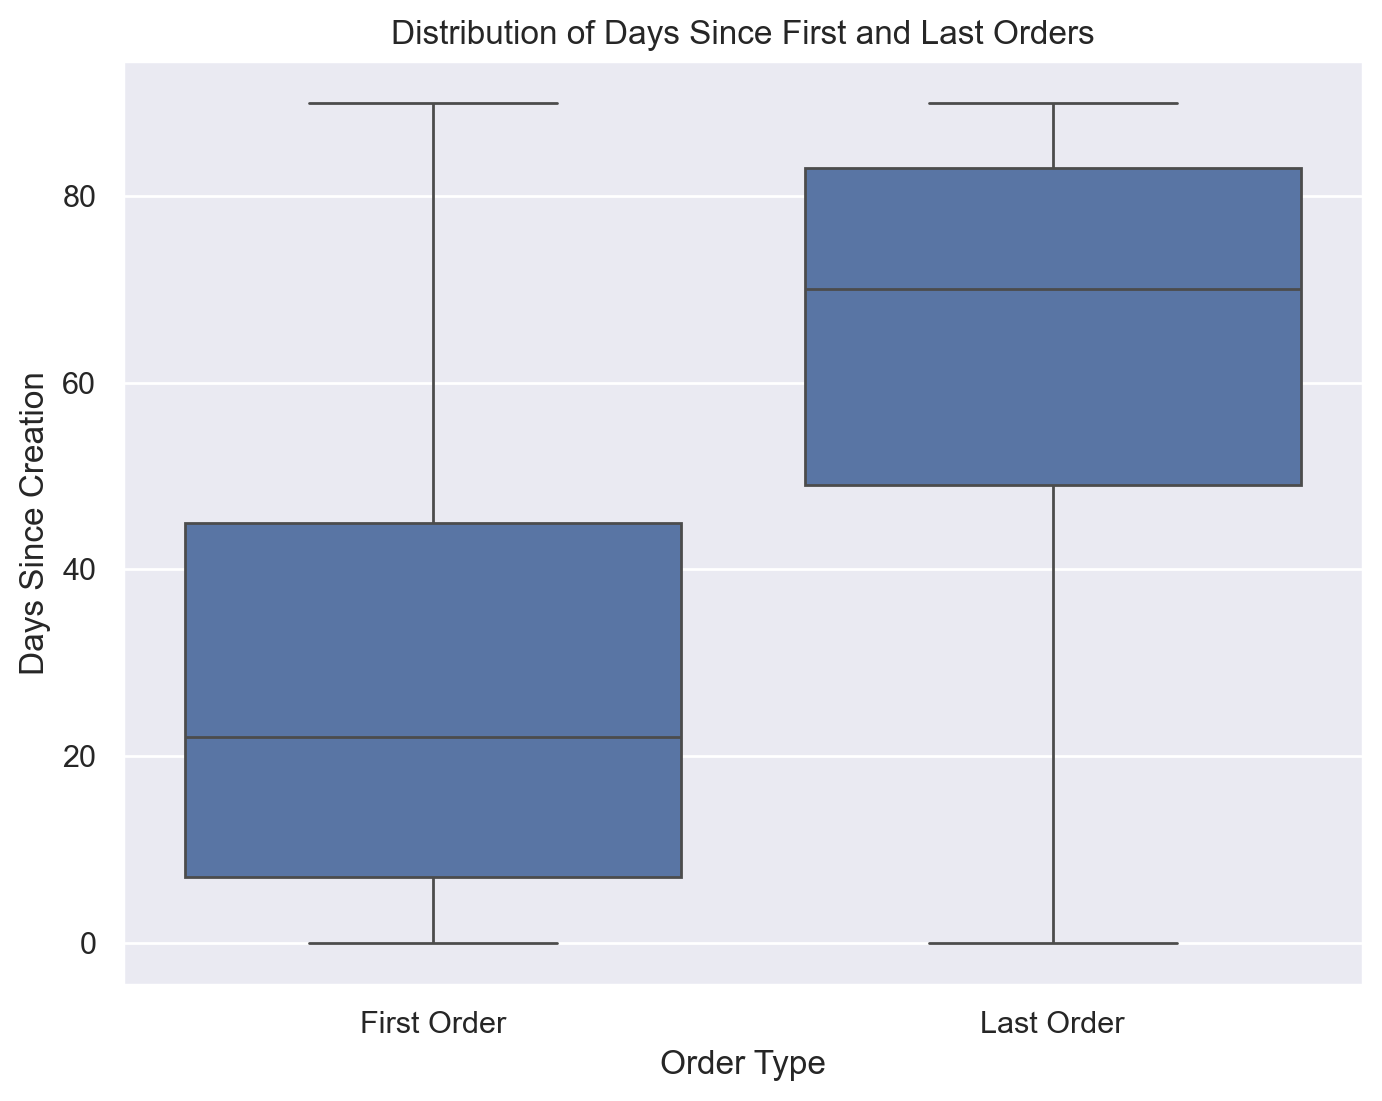

In [61]:
plt.figure(figsize=(8, 6))

# Create a DataFrame for boxplot
order_data = pd.DataFrame({
    'First Order': food_df['first_order'],
    'Last Order': food_df['last_order']
})

# Melt the DataFrame for seaborn
order_data_melted = order_data.melt(var_name='Order Type', value_name='Days Since Creation')

# Plot the boxplot
sns.boxplot(x='Order Type', y='Days Since Creation', data=order_data_melted)
plt.title('Distribution of Days Since First and Last Orders')
plt.xlabel('Order Type')
plt.ylabel('Days Since Creation')
plt.show()

#TODO procurar uma solução  melhor

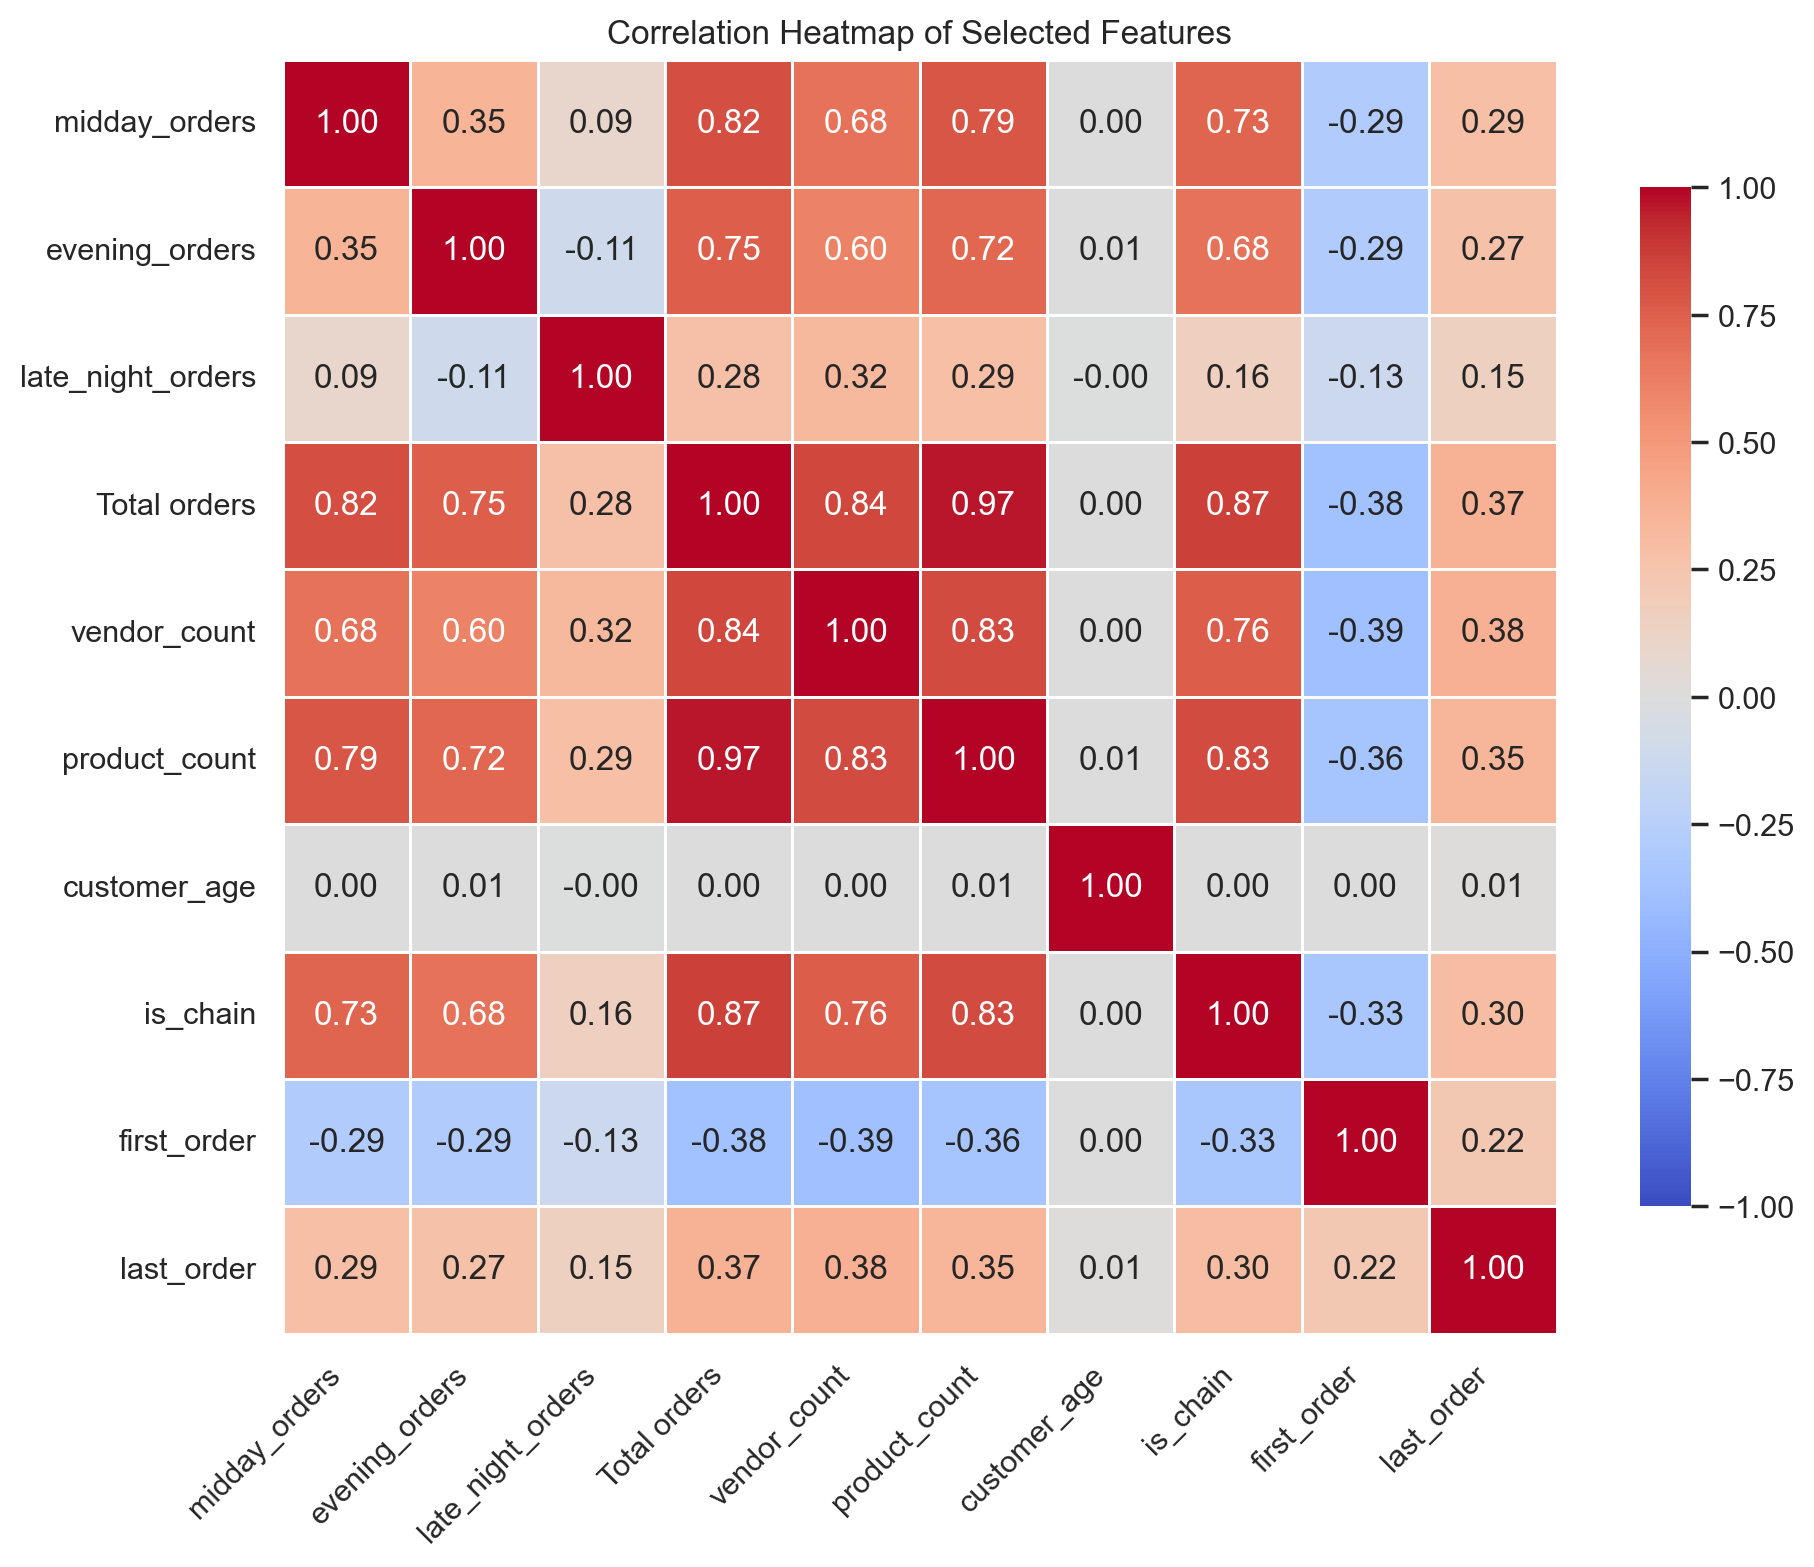

In [66]:
selected_features = [
    'midday_orders', 'evening_orders', 'late_night_orders',
    'Total orders', 'vendor_count', 'product_count', 
    'customer_age', 'is_chain','first_order', 'last_order'
]

# Step 2: Calculate the correlation matrix for the selected features
correlation_matrix = food_df[selected_features].corr()

# Step 3: Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,  # Show correlation coefficients
            fmt='.2f',   # Format for the annotation
            cmap='coolwarm',  # Color map
            square=True,  # Make cells square
            cbar_kws={"shrink": .8},  # Color bar size
            linewidths=0.5,  # Lines between cells
            vmin=-1,  # Minimum limit for color bar
            vmax=1)  # Maximum limit for color bar

# Set titles and labels
plt.title('Correlation Heatmap of Selected Features')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for readability
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

## Numerical Variables

## Categorical Variables

In [32]:
food_df['HR_0'] = food_df['HR_0'].fillna(food_df['Total orders'] - food_df['Total orders_HR'])

In [35]:
food_df.isna().sum()

customer_region     442
customer_age        727
vendor_count          0
product_count         0
is_chain              0
                   ... 
afternoon_orders      0
evening_orders        0
night_orders          0
Total orders          0
Total orders_HR       0
Length: 61, dtype: int64